In [22]:
# Imports
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

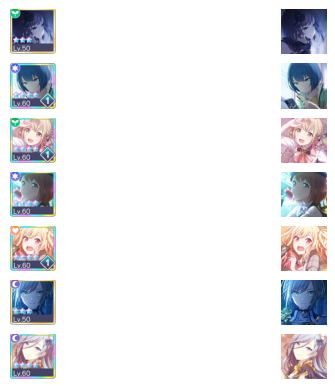

In [23]:
# Some manually matched thumbnails
matching_images = [
    ("./extracted_thumbnails/ena.png", "./thumbnails/res019_no014_after_training.png"),
    ("./extracted_thumbnails/haruka.png", "./thumbnails/res006_no017_normal.png"),
    ("./extracted_thumbnails/kohane.png", "./thumbnails/res009_no007_after_training.png"),
    ("./extracted_thumbnails/minori.png", "./thumbnails/res005_no015_after_training.png"),
    ("./extracted_thumbnails/saki.png", "./thumbnails/res002_no015_normal.png"),
    ("./extracted_thumbnails/shiho.png", "./thumbnails/res004_no016_after_training.png"),
    ("./extracted_thumbnails/shizuku.png", "./thumbnails/res008_no008_after_training.png"),
]

cols = 2
rows = len(matching_images)

fig, axes = plt.subplots(rows, cols)

for i in range(rows):
    extracted = cv.imread(matching_images[i][0])
    axes[i, 0].set_axis_off()
    axes[i, 0].imshow(extracted[..., ::-1])

    reference = cv.imread(matching_images[i][1])
    axes[i, 1].set_axis_off()
    axes[i, 1].imshow(reference[..., ::-1])

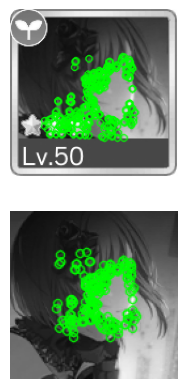

In [24]:
# Feature detection using ORB for Ena's thumbnail
img_ena_extracted_gray = cv.imread(matching_images[0][0], cv.IMREAD_GRAYSCALE)
img_ena_reference_gray = cv.imread(matching_images[0][1], cv.IMREAD_GRAYSCALE)

orb = cv.ORB_create()

# Find keypoints and compute descriptors
kp_ena_extracted, desc_ena_extracted = orb.detectAndCompute(img_ena_extracted_gray, None)
kp_ena_reference, desc_ena_reference = orb.detectAndCompute(img_ena_reference_gray, None)

# Draw keypoints onto each image
img_ena_extracted_keypoints = cv.drawKeypoints(img_ena_extracted_gray, kp_ena_extracted, None, color=(0, 255, 0), flags=0)
img_ena_reference_keypoints = cv.drawKeypoints(img_ena_reference_gray, kp_ena_reference, None, color=(0, 255, 0), flags=0)

fig, axes = plt.subplots(2, 1)
axes[0].set_axis_off()
axes[0].imshow(img_ena_extracted_keypoints)

axes[1].set_axis_off()
axes[1].imshow(img_ena_reference_keypoints)

100 matches
Minimum Distance: 5.0
Average Distance: 29.11
Median Distance: 22.0
Maximum Distance: 76.0


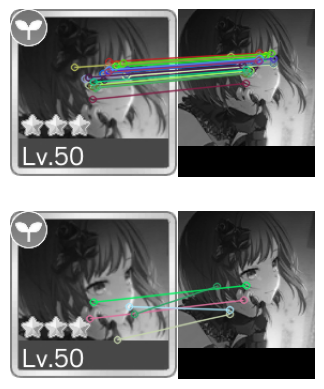

In [25]:
# Feature matching with brute-force matching
bf_matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
bf_matches_ena = bf_matcher.match(desc_ena_extracted, desc_ena_reference)

distances_ena = [match.distance for match in bf_matches_ena]

print(len(bf_matches_ena), "matches")
print("Minimum Distance:", np.min(distances_ena))
print("Average Distance:", np.average(distances_ena))
print("Median Distance:", np.median(distances_ena))
print("Maximum Distance:", np.max(distances_ena))

# Sort in order of distance
bf_matches_ena = sorted(bf_matches_ena, key = lambda x: x.distance)

# Draw the 25 best matches
# These ones seem to be pretty good - can be quite confident in these ones
img_ena_best_matches = cv.drawMatches(
    img_ena_extracted_gray, kp_ena_extracted,
    img_ena_reference_gray, kp_ena_reference,
    bf_matches_ena[:25], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Draw the 5 worst matches
# There's actually not too many mismatched features - this thumbnail only had 3 mismatches
img_ena_worst_matches = cv.drawMatches(
    img_ena_extracted_gray, kp_ena_extracted,
    img_ena_reference_gray, kp_ena_reference,
    bf_matches_ena[95:100], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

fig, axes = plt.subplots(2, 1)
axes[0].set_axis_off()
axes[0].imshow(img_ena_best_matches)

axes[1].set_axis_off()
axes[1].imshow(img_ena_worst_matches)

./extracted_thumbnails/ena.png <---> ./thumbnails/res019_no014_after_training.png
- Keypoints: 297 <---> 183
- Total Matches: 100
- Minimum Distance: 5.0
- Average Distance: 29.11
- Median Distance: 22.0
- Maximum Distance: 76.0

./extracted_thumbnails/haruka.png <---> ./thumbnails/res006_no017_normal.png
- Keypoints: 272 <---> 154
- Total Matches: 83
- Minimum Distance: 5.0
- Average Distance: 34.06024096385542
- Median Distance: 26.0
- Maximum Distance: 86.0

./extracted_thumbnails/kohane.png <---> ./thumbnails/res009_no007_after_training.png
- Keypoints: 279 <---> 187
- Total Matches: 82
- Minimum Distance: 7.0
- Average Distance: 34.573170731707314
- Median Distance: 27.0
- Maximum Distance: 84.0

./extracted_thumbnails/minori.png <---> ./thumbnails/res005_no015_after_training.png
- Keypoints: 224 <---> 86
- Total Matches: 43
- Minimum Distance: 10.0
- Average Distance: 33.48837209302326
- Median Distance: 25.0
- Maximum Distance: 81.0

./extracted_thumbnails/saki.png <---> ./thumb

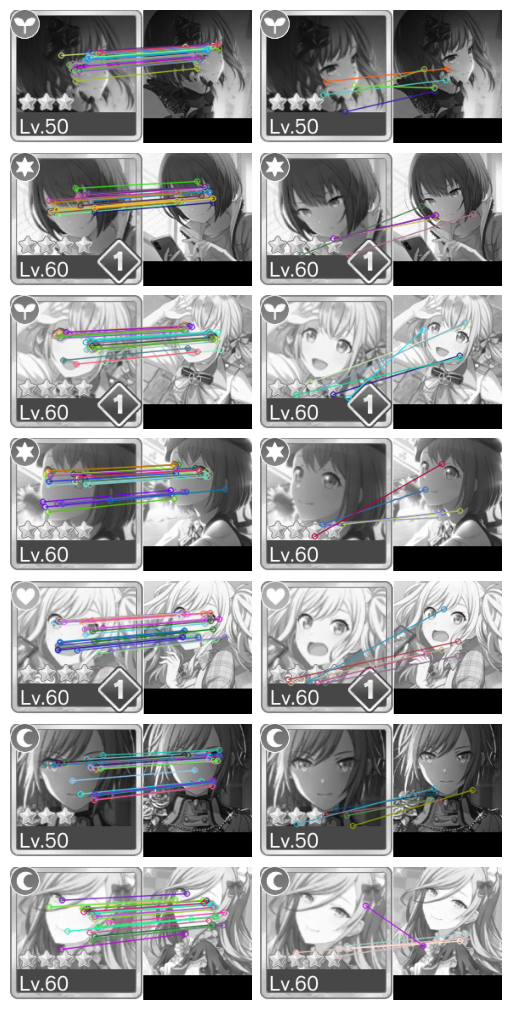

In [47]:
# Repeating this process for all of the thumbnails
# Some of the mismatches are caused by the rarity stars having keypoints, not much we can do here
# For high confidence, it looks like the number of matches needs to be around 50% of the reference keypoint count
orb = cv.ORB_create()
bf_matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

rows = len(matching_images)
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(5, 10), constrained_layout=True)

for i in range(rows):
    (path_extracted, path_reference) = matching_images[i]
    img_extracted_gray = cv.imread(path_extracted, cv.IMREAD_GRAYSCALE)
    img_reference_gray = cv.imread(path_reference, cv.IMREAD_GRAYSCALE)

    # Find keypoints and compute descriptors
    kp_extracted, desc_extracted = orb.detectAndCompute(img_extracted_gray, None)
    kp_reference, desc_reference = orb.detectAndCompute(img_reference_gray, None)

    # Match features with brute-force matching
    bf_matches = bf_matcher.match(desc_extracted, desc_reference)
    
    # Sort in order of distance
    bf_matches = sorted(bf_matches, key = lambda x: x.distance)
    match_distances = [match.distance for match in bf_matches]

    # Some stats about the matched features
    print(path_extracted, "<--->", path_reference)
    print("- Keypoints:", len(kp_extracted), "<--->", len(kp_reference))
    print("- Total Matches:", len(bf_matches))
    print("- Minimum Distance:", np.min(match_distances))
    print("- Average Distance:", np.average(match_distances))
    print("- Median Distance:", np.median(match_distances))
    print("- Maximum Distance:", np.max(match_distances))
    print()

    # Draw the 25 best matches
    img_best_matches = cv.drawMatches(
        img_extracted_gray, kp_extracted,
        img_reference_gray, kp_reference,
        bf_matches[:25], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Draw the 5 worst matches
    img_worst_matches = cv.drawMatches(
        img_extracted_gray, kp_extracted,
        img_reference_gray, kp_reference,
        bf_matches[-5:], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    axes[i, 0].set_axis_off()
    axes[i, 0].imshow(img_best_matches)

    axes[i, 1].set_axis_off()
    axes[i, 1].imshow(img_worst_matches)